In [1]:
import numpy as np
import mygrad as mg

%matplotlib notebook
import matplotlib.pyplot as plt

from collections import Counter, defaultdict

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

import re, string

import torch
from torch.utils.data import DataLoader, TensorDataset

# this creates a regular expression that identifies all punctuation character
# don't include this in `strip_punc`, otherwise you will re-compile this expression
# every time you call the function
punc_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))

def strip_punc(corpus):
    """ Removes all punctuation from a string.

    Parameters
    ----------
    corpus : str

    Returns
    -------
    str
        the corpus with all punctuation removed"""
    # substitute all punctuation marks with ""
    return punc_regex.sub('', corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koalum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print(type(stopwords))

<class 'set'>


In [2]:
import pandas as pd
import numpy as np

import nltk
nltk.download("stopwords")

from textblob import TextBlob, Word, Blobber

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koalum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
text = TextBlob("very happy")
print(text)
text.sentiment

#polarity: 1 is a high positive sentiment and -1 is a high negative sentiment
#subjectivity: 1 is a mostly a public opinion and not a factual piece of information and vice versa

very happy


Sentiment(polarity=1.0, subjectivity=1.0)

In [37]:
happy_pharrell_williams = "It might seem crazy what I'm 'bout to say\nSunshine she's here, you can take a break\nI'm a hot air balloon that could go to space\nWith the air, like I don't care, baby, by the way\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do\nHere come bad news, talking this and that (Yeah!)\nWell, give me all you got, don't hold it back (Yeah!)\nWell, I should probably warn ya, I'll be just fine (Yeah!)\nNo offense to you, don’t waste your time, here's why\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do\nBring me down\nCan't nothing bring me down\nMy level's too high to bring me down\nCan't nothing bring me down, I said\nBring me down\nCan't nothing bring me down\nMy level's too high to bring me down\nCan't nothing bring me down, I said\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do\nBring me down\nCan't nothing bring me down\nMy level's too high to bring me down\nCan't nothing bring me down, I said...\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do\n(Because I'm happy)\nClap along if you feel like a room without a roof\n(Because I'm happy)\nClap along if you feel like happiness is the truth\n(Because I'm happy)\nClap along if you know what happiness is to you\n(Because I'm happy)\nClap along if you feel like that's what you wanna do"
print(happy_pharrell_williams)
lyrics = happy_pharrell_williams.split()
new_lyrics = [word for word in lyrics if word not in stopwords]

new_lyrics = " ".join(new_lyrics)
new_lyrics = TextBlob(new_lyrics)
new_lyrics.sentiment

It might seem crazy what I'm 'bout to say
Sunshine she's here, you can take a break
I'm a hot air balloon that could go to space
With the air, like I don't care, baby, by the way
(Because I'm happy)
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Here come bad news, talking this and that (Yeah!)
Well, give me all you got, don't hold it back (Yeah!)
Well, I should probably warn ya, I'll be just fine (Yeah!)
No offense to you, don’t waste your time, here's why
(Because I'm happy)
Clap along if you feel like a room without a roof
(Because I'm happy)
Clap along if you feel like happiness is the truth
(Because I'm happy)
Clap along if you know what happiness is to you
(Because I'm happy)
Clap along if you feel like that's what you wanna do
Bring me down
Can't nothing bring me down

Sentiment(polarity=0.5564409722222224, subjectivity=0.6625694444444442)

In [38]:
#entire song as a whole
happy_pharrell_williams = TextBlob(happy_pharrell_williams)
happy_pharrell_williams.sentiment

Sentiment(polarity=0.4440204678362574, subjectivity=0.6035672514619883)

In [3]:
import pandas as pd
data = pd.read_csv("train_lyrics.csv")
data

file               artist                        title  \
0    TRAAAAW128F429D538.h5               Casual             I Didn't Mean To   
1    TRAAAEF128F4273421.h5             Adam Ant              Something Girls   
2    TRAAAFD128F92F423A.h5                  Gob               Face the Ashes   
3    TRAABJV128F1460C49.h5        Lionel Richie      Tonight Will Be Alright   
4    TRAABLR128F423B7E3.h5           Blue Rodeo                     Floating   
..                     ...                  ...                          ...   
995  TRBIGRY128F42597B3.h5                 Sade           All About Our Love   
996  TRBIIEU128F9307C88.h5      New Found Glory  Don't Let Her Pull You Down   
997  TRBIIJY12903CE4755.h5       Mindy McCready          Ten Thousand Angels   
998  TRBIIOT128F423C594.h5         Joy Division               Leaders Of Men   
999  TRBIJYB128F14AE326.h5  Seventh Day Slumber               Shattered Life   

                                                lyrics        genre   mood  \
0    Verse One:\r\n\r\nAlright I might\r\nHave had ...  Hip Hop/Rap    sad   
1    Adam Ant/Marco Pirroni\r\nEvery girl is a some...         Rock  happy   
2    I've just erased it's been a while, I've got a...         Rock    sad   
3    Little darling \r\nWhere you've been so long \...          R&B  happy   
4    Lead Vocal by Greg\r\n\r\nWell, these late nig...         Rock    sad   
..                                                 ...          ...    ...   
995  Its all about our love\r\nSo shall it be forev...          R&B    sad   
996  It's time that I rain on your parade\r\nWatch ...         Rock  happy   
997  Speakin of the devil\r\nLook who just walked i...      Country  happy   
998  Born from some mother's womb\r\nJust like any ...         Rock    sad   
999  This wanting more from me is tearing me, it's ...         Rock    sad   

     year  
0    1994  
1    1982  
2    2007  
3    1986  
4    1987  
..    ...  
995  2000  
996  2009  
997  1996  
998  1978  
999  2005  

[1000 rows x 7 columns]

In [4]:
data.values

array([['TRAAAAW128F429D538.h5', 'Casual', "I Didn't Mean To", ...,
        'Hip Hop/Rap', 'sad', 1994],
       ['TRAAAEF128F4273421.h5', 'Adam Ant', 'Something Girls', ...,
        'Rock', 'happy', 1982],
       ['TRAAAFD128F92F423A.h5', 'Gob', 'Face the Ashes', ..., 'Rock',
        'sad', 2007],
       ...,
       ['TRBIIJY12903CE4755.h5', 'Mindy McCready', 'Ten Thousand Angels',
        ..., 'Country', 'happy', 1996],
       ['TRBIIOT128F423C594.h5', 'Joy Division', 'Leaders Of Men', ...,
        'Rock', 'sad', 1978],
       ['TRBIJYB128F14AE326.h5', 'Seventh Day Slumber', 'Shattered Life',
        ..., 'Rock', 'sad', 2005]], dtype=object)

In [5]:
titles = data.values[:, 2]
titles

array(["I Didn't Mean To", 'Something Girls', 'Face the Ashes',
       'Tonight Will Be Alright', 'Floating', 'Caught In A Dream',
       'Setting Fire to Sleeping Giants',
       'James (Hold The Ladder Steady)', 'Made Like This (Live)',
       'Spanish Grease', 'The Emperor Falls',
       'It Makes No Difference Now', 'Angie (1993 Digital Remaster)',
       'Crossfire', 'Nashville Parthenon', 'The More I See You',
       'Certain Things We Do', 'Forming', 'Driving Home For Christmas',
       'Deform (live)', 'Wicker Chair', 'Stickin In My Eye',
       'Panama (Remastered Album Version)', "Let's Get It Started",
       'Metal', 'She Fell Away (2009 Digital Remaster)', "It's My Party",
       'Indian Love Call', 'You Can Still Be Free', 'I Never Came',
       'Commercial Reign', 'WKYA (drop)', 'Hate',
       "I Can't Stop Loving You",
       'How Can You Call That Beautiful (Stewkey Vocal)', 'Candy Man',
       'On Bended Knee', 'Little Girl (LP Version)', 'White Feather',
       'They

In [6]:
lyrics = data.values[:,3]

In [7]:
# lowercases ech song lyric
new_lyrics = [" ".join(lyric.lower().split()) for lyric in lyrics]

# remove the punctuation
new_lyrics = [strip_punc(lyric) for lyric in new_lyrics]

vocab_count = Counter(" ".join(new_lyrics).split())

word_to_num = {word[0]: num for num, word in enumerate(vocab_count.most_common(), start=1)}

new_lyrics = [lyric.split() for lyric in new_lyrics]


In [9]:
labels = data.values[:,5]

In [ ]:
titles_to_labels = dict(zip(titles, labels))
titles_to_labels

In [10]:
lyrics_encoding = [[word_to_num[word] for word in lyric] for lyric in new_lyrics]

labels_encoding = [1 if label == 'happy' else 0 for label in labels]
lyrics_encoding

[[329,
  46,
  219,
  2,
  310,
  65,
  135,
  6,
  111,
  4745,
  34,
  2,
  2245,
  63,
  125,
  2465,
  26,
  2,
  303,
  23,
  64,
  50,
  30,
  14,
  64,
  2245,
  87,
  62,
  8,
  272,
  6489,
  7,
  14,
  64,
  50,
  523,
  13,
  4,
  7,
  2,
  3179,
  30,
  6,
  3180,
  41,
  2,
  737,
  553,
  31,
  4,
  937,
  84,
  60,
  2,
  92,
  27,
  3782,
  2,
  3783,
  84,
  5,
  84,
  366,
  19,
  6490,
  60,
  2,
  22,
  69,
  4,
  67,
  8,
  4746,
  35,
  4747,
  5,
  1219,
  7,
  93,
  4748,
  26,
  34,
  628,
  418,
  2,
  40,
  342,
  10,
  1,
  4749,
  3784,
  30,
  6491,
  2,
  3785,
  8,
  4750,
  5,
  4746,
  114,
  4751,
  2,
  303,
  260,
  4,
  26,
  34,
  3,
  3786,
  3,
  41,
  680,
  132,
  16,
  1,
  6492,
  27,
  352,
  331,
  10,
  239,
  1269,
  6,
  4752,
  124,
  15,
  10,
  2065,
  22,
  738,
  9,
  310,
  19,
  12,
  116,
  14,
  15,
  669,
  102,
  2,
  303,
  260,
  4,
  139,
  458,
  711,
  9,
  92,
  8,
  1551,
  14,
  12,
  116,
  36,
  489,
  9,
  92,
  8,

<IPython.core.display.Javascript object>


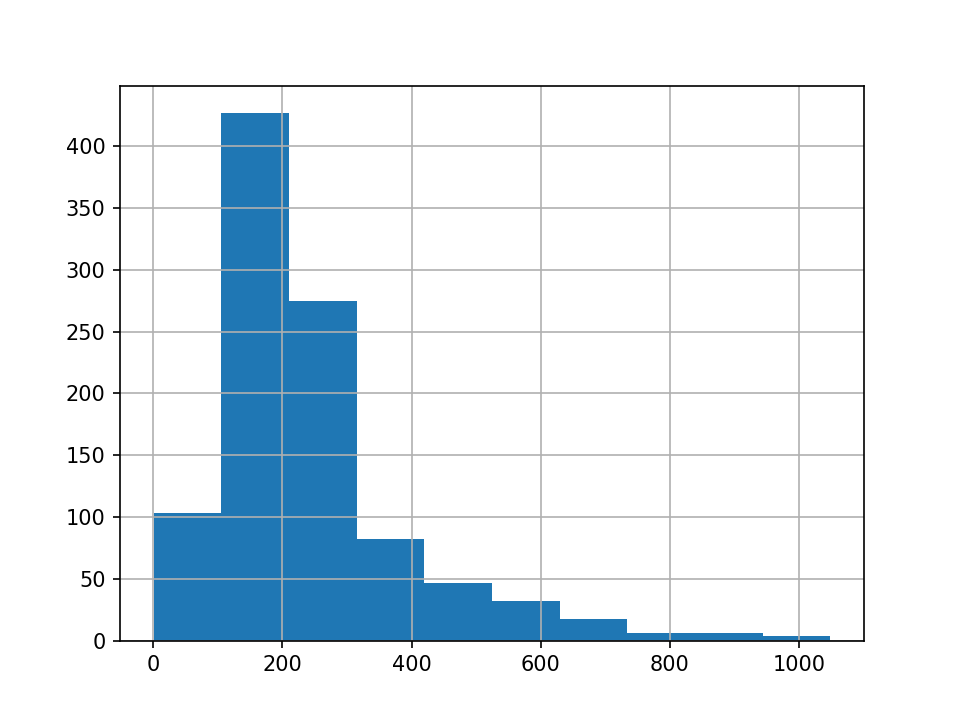

count    1000.000000
mean      242.029000
std       150.612185
min         1.000000
25%       148.750000
50%       204.500000
75%       281.250000
max      1048.000000
dtype: float64

In [11]:
lyrics_len = [len(x) for x in lyrics_encoding]
pd.Series(lyrics_len).hist()
plt.show()

pd.Series(lyrics_len).describe()

In [20]:
new_lyrics_encoding = [
    lyrics_encoding[i] for i, lyric_len in enumerate(lyrics_len)
    if lyric_len > 50 and lyric_len < 500
]

new_labels_encoding = [
    labels_encoding[i] for i, lyric_len in enumerate(lyrics_len)
    if lyric_len > 50 and lyric_len < 500
]
new_labels_encoding = np.array(new_labels_encoding)

In [104]:
len(new_lyrics_encoding)

915

<IPython.core.display.Javascript object>


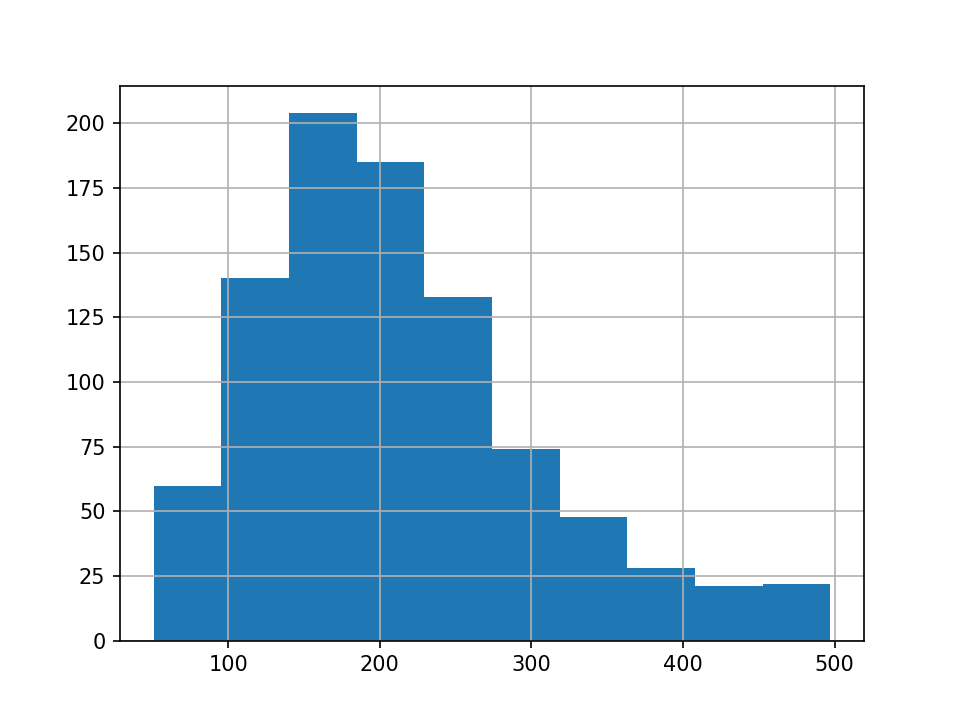

count    915.00000
mean     212.67541
std       91.83971
min       51.00000
25%      147.00000
50%      198.00000
75%      262.50000
max      497.00000
dtype: float64

In [13]:
lyrics_len = [len(x) for x in new_lyrics_encoding]
pd.Series(lyrics_len).hist()
plt.show()

pd.Series(lyrics_len).describe()

In [49]:
print(len(max(lyrics_encoding, key=len)))

1048


In [14]:
def pad_features(lyrics_encoding, seq_length):
    '''
    Return features of review_ints, where each review is
    padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(lyrics_encoding), seq_length), dtype = int)
    
    for i, lyric in enumerate(lyrics_encoding):
        lyric_len = len(lyric)
        
        if lyric_len <= seq_length:
            zeroes = list(np.zeros(seq_length-lyric_len))
            new = zeroes + lyric
        elif lyric_len > seq_length:
            new = lyric[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [15]:
features = pad_features(new_lyrics_encoding, 400)
features = np.array(features)

print(len(features))
print(features[:10,:])

915
[[ 329   46  219 ...    2  641   63]
 [   0    0    0 ...  168   36  211]
 [   0    0    0 ...   18  915    7]
 ...
 [   0    0    0 ...    1 1770  788]
 [   0    0    0 ...   31   12   91]
 [   0    0    0 ...   92   27   25]]


In [25]:
len_feat = len(features)

split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = new_labels_encoding[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = new_labels_encoding[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [23]:
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [32]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (False):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [33]:
vocab_size = len(vocab_count) + 1
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

model = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

In [29]:
print(model)

SentimentLSTM(
  (embedding): Embedding(12323, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [34]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
# if(train_on_gpu):
#     model.cuda()

model.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        # if(train_on_gpu):
        #     inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                # if(train_on_gpu):
                #     inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            model.train()
            print(f"Epoch: {e + 1}/{epochs}...",
                  f"Step: {counter}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

KeyboardInterrupt: 